<a href="https://colab.research.google.com/github/Yuvraj2002/NLP_Project/blob/main/amazon_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string


In [ ]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
set1=pd.read_csv('../input/d/datafiniti/consumer-reviews-of-amazon-products/1429_1.csv')
set2=pd.read_csv('../input/d/datafiniti/consumer-reviews-of-amazon-products/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv')
set3=pd.read_csv('../input/d/datafiniti/consumer-reviews-of-amazon-products/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (1,10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df=pd.concat([set1,set2,set3])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67992 entries, 0 to 28331
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    67992 non-null  object 
 1   name                  61232 non-null  object 
 2   asins                 67990 non-null  object 
 3   brand                 67992 non-null  object 
 4   categories            67992 non-null  object 
 5   keys                  67992 non-null  object 
 6   manufacturer          67992 non-null  object 
 7   reviews.date          67953 non-null  object 
 8   reviews.dateAdded     25091 non-null  object 
 9   reviews.dateSeen      67992 non-null  object 
 10  reviews.didPurchase   10 non-null     object 
 11  reviews.doRecommend   55152 non-null  object 
 12  reviews.id            71 non-null     float64
 13  reviews.numHelpful    55246 non-null  float64
 14  reviews.rating        67959 non-null  float64
 15  reviews.sourceURLs 

In [ ]:
df.isnull().sum()

id                          0
name                     6760
asins                       2
brand                       0
categories                  0
keys                        0
manufacturer                0
reviews.date               39
reviews.dateAdded       42901
reviews.dateSeen            0
reviews.didPurchase     67982
reviews.doRecommend     12840
reviews.id              67921
reviews.numHelpful      12746
reviews.rating             33
reviews.sourceURLs          0
reviews.text                1
reviews.title              18
reviews.userCity        67992
reviews.userProvince    67992
reviews.username            2
dateAdded               34660
dateUpdated             34660
primaryCategories       34660
imageURLs               34660
manufacturerNumber      34660
sourceURLs              34660
dtype: int64

In [ ]:
df['reviews.rating']=df['reviews.rating'].fillna('Missing')
df['reviews.text']=df['reviews.text'].fillna('Missing')

In [ ]:
df.isnull().sum()

id                          0
name                     6760
asins                       2
brand                       0
categories                  0
keys                        0
manufacturer                0
reviews.date               39
reviews.dateAdded       42901
reviews.dateSeen            0
reviews.didPurchase     67982
reviews.doRecommend     12840
reviews.id              67921
reviews.numHelpful      12746
reviews.rating              0
reviews.sourceURLs          0
reviews.text                0
reviews.title              18
reviews.userCity        67992
reviews.userProvince    67992
reviews.username            2
dateAdded               34660
dateUpdated             34660
primaryCategories       34660
imageURLs               34660
manufacturerNumber      34660
sourceURLs              34660
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67992 entries, 0 to 28331
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    67992 non-null  object 
 1   name                  61232 non-null  object 
 2   asins                 67990 non-null  object 
 3   brand                 67992 non-null  object 
 4   categories            67992 non-null  object 
 5   keys                  67992 non-null  object 
 6   manufacturer          67992 non-null  object 
 7   reviews.date          67953 non-null  object 
 8   reviews.dateAdded     25091 non-null  object 
 9   reviews.dateSeen      67992 non-null  object 
 10  reviews.didPurchase   10 non-null     object 
 11  reviews.doRecommend   55152 non-null  object 
 12  reviews.id            71 non-null     float64
 13  reviews.numHelpful    55246 non-null  float64
 14  reviews.rating        67992 non-null  object 
 15  reviews.sourceURLs 

In [ ]:
review=pd.concat([df['reviews.text'],df['reviews.rating']], axis=1)
review.head()

,reviews.text,reviews.rating
0,This product so far has not disappointed. My c...,5.0
1,great for beginner or experienced person. Boug...,5.0
2,Inexpensive tablet for him to use and learn on...,5.0
3,I've had my Fire HD 8 two weeks now and I love...,4.0
4,I bought this for my grand daughter when she c...,5.0


In [ ]:
review.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 67992 entries, 0 to 28331
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviews.text    67992 non-null  object
 1   reviews.rating  67992 non-null  object
dtypes: object(2)
memory usage: 1.6+ MB


In [ ]:
review['reviews.rating'].value_counts()

5.0        47150
4.0        15397
3.0         2902
1.0         1438
2.0         1072
Missing       33
Name: reviews.rating, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


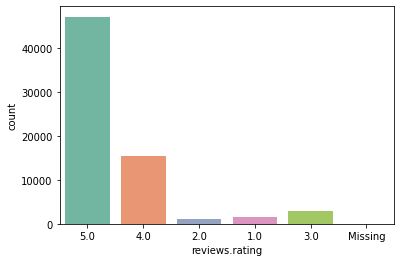

In [ ]:
sns.countplot(review['reviews.rating'],palette ='Set2')
plt.ylabel=('count')
plt.xlabel=('rating')
plt.show()

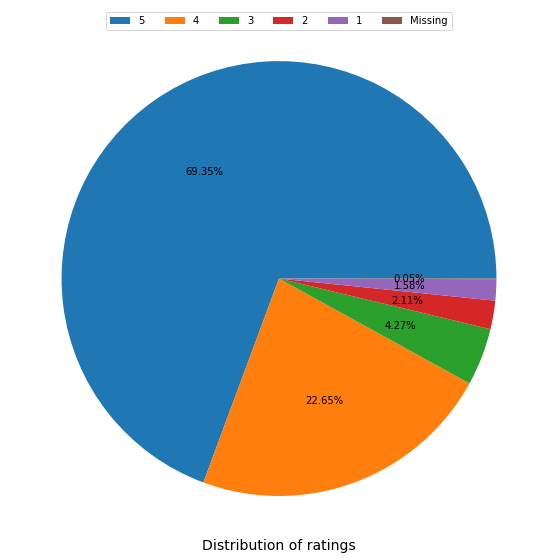

In [ ]:
plt.figure(figsize = (10, 10))
label=[5,4,3,2,1,'Missing']
plt.pie(review['reviews.rating'].value_counts(), autopct='%0.2f%%')
plt.legend(label, ncol=6, loc=9)
plt.title('Distribution of ratings', size=14, y=-0.01)
plt.show()


# Data Preprocessing

In [ ]:
sentiment = {'Missing':-1,
            1: 0,
            2: 0,
            3: 0,
            4: 1,
            5: 1}

In [ ]:
review['sentiment']=review['reviews.rating'].map(sentiment)

In [ ]:
review['sentiment'].value_counts()

 1    62547
 0     5412
-1       33
Name: sentiment, dtype: int64

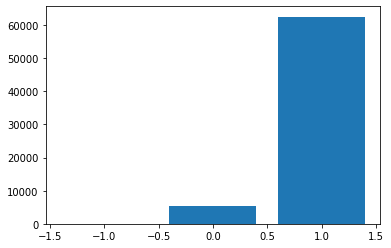

In [ ]:
counts=review['sentiment'].value_counts()
plt.bar(counts.index, counts.values)
plt.show()

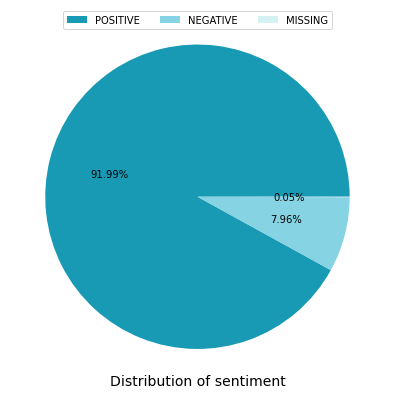

In [ ]:
plt.figure(figsize = (7, 7))

labels = ['POSITIVE', 'NEGATIVE','MISSING']
colors = ['#189AB4', '#86D3E3','#D4F1F4']
plt.pie(review['sentiment'].value_counts(), autopct='%0.2f%%',colors=colors)

plt.title('Distribution of sentiment', size=14, y=-0.01)
plt.legend(labels, ncol=3, loc=9)
plt.show()

In [ ]:
words = pd.Series(' '.join(review['reviews.text']).split())
words

0             This
1          product
2               so
3              far
4              has
            ...   
1943617         to
1943618     anyone
1943619         on
1943620          a
1943621    budget.
Length: 1943622, dtype: object

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer

In [ ]:
stopword_list = stopwords.words('english')
suitable_stopwords=[]
l =["n'",'nor','no','not']
for i in stopword_list:
    if not any(words in i for words in l):
        suitable_stopwords.append(i)
print(stopword_list)
print(suitable_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
suitable_stopwords=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you','' "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should','play','playing','tablet','use','get','kindel','read','book','device','year','time','want', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y']
replace_list=['ain','hate','bad','worse', 'aren', 'couldn', 'didn', 'doesn', 'hadn', 'hasn', 'haven', 'isn', 'mightn', 'mustn', 'needn',
              'shan', 'shouldn', 'wasn', 'weren', 'won', 'wouldn',"n't","n'"]

In [ ]:
def cleanstr(text):
    text=text.lower()
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text = re.sub('\s+', ' ', text)
    text = re.sub(' \d+', ' ', text)
    return text

In [ ]:
def remove_stopwords(stmt):
    filtered_sentence = []
    stmt=stmt.lower()
    words = word_tokenize(stmt)
    
    for w in words:
        if w not in suitable_stopwords:
            if w not in replace_list:
                filtered_sentence.append(w)
            else:
                filtered_sentence.append(w+' not')
    return " ".join(filtered_sentence)

In [ ]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [ ]:
def lemmatize(text):
    wl = WordNetLemmatizer()
    lemmatized_sentence = []
    # Tokenize the sentence
    words = word_tokenize(text)
    word_pos_tags = nltk.pos_tag(words)
    for idx, tag in enumerate(word_pos_tags):
        lemmatized_sentence.append(wl.lemmatize(tag[0], get_wordnet_pos(tag[1])))

    return " ".join(lemmatized_sentence)

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


True

In [ ]:
review['text']=review['reviews.text'].apply(cleanstr)
review['text']=review['text'].apply(remove_stopwords)
review['text']=review['text'].apply(lemmatize)
review['text'].iloc[0]

'product far disappointed child love like ability monitor control content see ease'

# Word Cloud

In [ ]:
positive = review[review['sentiment'] == 1]
negative = review[review['sentiment'] == 0]
unknown = review[review['sentiment'] == -1]

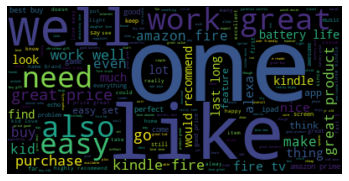

In [ ]:
pos = " ".join(review for review in positive.text)
wordcloud2 = WordCloud(stopwords=suitable_stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

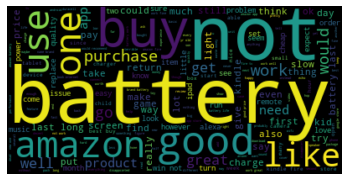

In [ ]:
neg = " ".join(review for review in negative.text)
wordcloud3 = WordCloud(stopwords=replace_list).generate(neg)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud33.png')
plt.show()

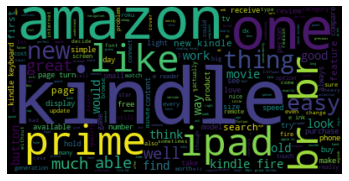

In [ ]:
neu = " ".join(review for review in unknown.text)
wordcloud3 = WordCloud(stopwords=suitable_stopwords).generate(neu)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud33.png')
plt.show()

In [ ]:
index = review.index
review['random_number'] = np.random.randn(len(index))
train = review[review['random_number'] <= 0.8]
test = review[review['random_number'] > 0.8]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC



In [ ]:
tfidf = TfidfVectorizer()
train_matrix = tfidf.fit_transform(train['reviews.text'])
test_matrix = tfidf.transform(test['reviews.text'])

In [ ]:
# Logistic Regression
clf = LinearSVC()

In [ ]:
X_train = train_matrix
X_test = test_matrix
y_train = train['sentiment']
y_test = test['sentiment']

In [ ]:
clf.fit(X_train,y_train)

LinearSVC()

In [ ]:
predictions = clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))
clf.score(X_train, y_train)

[[    1     1     5]
 [    0   601   609]
 [    0   122 13075]]


              precision    recall  f1-score   support

          -1       1.00      0.14      0.25         7
           0       0.83      0.50      0.62      1210
           1       0.96      0.99      0.97     13197

    accuracy                           0.95     14414
   macro avg       0.93      0.54      0.61     14414
weighted avg       0.94      0.95      0.94     14414



0.9698383664937101

**the overall accuracy is 97.00%**

# Testing With personal review.

In [ ]:
text="I hate this device  "

text=cleanstr(text)
text=remove_stopwords(text)
text=(lemmatize(text))
print(text)

hate not


In [ ]:
vec=tfidf.transform([text])
pre=clf.predict(vec)
if pre==0:
    print("Negative")
else:
    print("Positive")


Negative
